***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* 3. Positional Astronomy  
    * Previous: [3.5 Horizontal Coordinates (ALT/AZ)](../3_Positional_Astronomy/E_Horizontal_Coordinates.ipynb)
    * Next: 3.7  

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import section specific modules:

In [2]:
from IPython.display import Image

## 3.6 Direction Cosine Coordinates ($l$,$m$,$n$)

There is another usefull astronomical coordinate system that we ought to introduce at this juncture, namely the *direction cosine coordinate system*. As will become apparent later, this coordinate system is very usefull in radio interferometry. The direction cosine coordinate system is quite powerfull and allows us to redefine the fundamental reference point on the celestial sphere, from which we measure all other celestial objects, to an arbitrary location (the vernal equinox need not be our fundamental reference point). Usually this arbitrary location is chosen to be the celestial source that we are interested in observing. This procedure allows us to create local skymaps of a region around our field center. We use three coordinates in the direction cosine coordinate system, namely $l$, $m$ and $n$. The coordinates $l$, $m$ and $n$ are dimensionless direction cosines, i.e.

\begin{eqnarray}
l &=& \cos(\alpha) = \frac{a_1}{|\mathbf{a}|}\\
m &=& \cos(\beta) = \frac{a_2}{|\mathbf{a}|}\\
n &=& \cos(\gamma) = \frac{a_3}{|\mathbf{a}|}
\end{eqnarray}

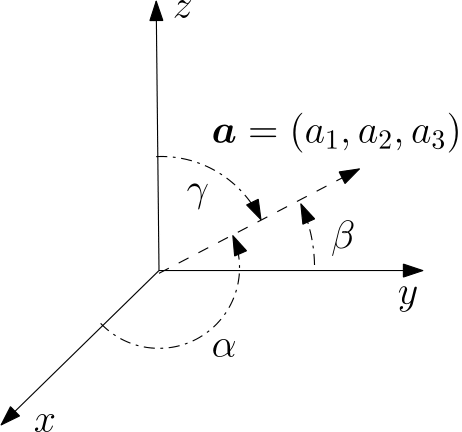

In [4]:
Image(filename='figures/cosine.png', width=300, height=100)

*Caption: Definition of direction cosines.*<a id='pos:fig:cosines'></a> <!--\label{pos:fig:cosines}-->

The quantities $\alpha$, $\beta$, $\gamma$, $a_1$, $a_2$, $a_3$ and $\mathbf{a}$ are all depicted in Fig. [INREF](#pos:fig:cosines) <!--\ref{pos:fig:cosines}-->. Moreover, $|\cdot|$ denotes the magnitude of its operand. The definitions above also imply that $l^2+m^2+n^2 = 1$. When $|\mathbf{a}|=1$ then we may simply interpret $l$, $m$ and $n$ as Cartesian coordinates. When we are working on the celestial sphere this assumption holds true. 

So the question now arises, how do we use $l$, $m$ and $n$ to point to celestial objects? In Fig. [INREF](#pos:fig:convert_lmn_ra_dec) <!--\ref{pos:fig:convert_lmn_ra_dec}--> we have defined our $l$, $m$ and $n$ axes. The $n$ axis points toward your field center $\mathbf{s}_c$. The field center $\mathbf{s}_c$, the NCP and our $m$-axis lie on the same great circle. Our $l$-axis is perpendicular to the $nm$-plane. In this direction cosine coordinate system we can use $\mathbf{s} = (l,m,n)$ to point to any celestial source, i.e. we can can point anywhere on the celestial sphere.

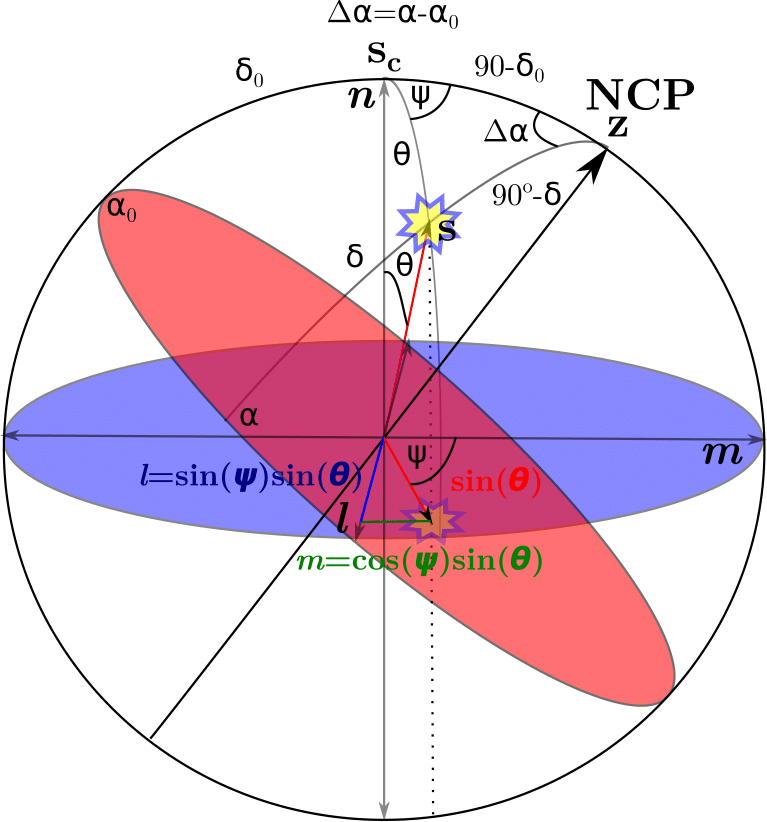

In [7]:
Image(filename='figures/conversion2.png', width=300, height=100)

*Caption: Converting between direction cosines and equatorial coordinates.*<a id='pos:fig:convert_lmn_ra_dec'></a> <!--\label{pos:fig:convert_lmn_ra_dec}-->

We use the following equations to convert between the equatorial and direction cosine coordinate systems. 

\begin{eqnarray}
l &=&  \sin \theta \sin \psi = \cos \delta  \sin \Delta \alpha \nonumber\\
m &=& \sin \theta \cos \psi = \sin \delta \cos \delta_0 - \cos \delta \sin \delta_0 \cos\Delta \alpha \nonumber\\
\delta &=& \sin^{-1}(m\cos \delta_0 + \sin \delta_0\sqrt{1-l^2-m^2})\nonumber\\
\alpha &=& \alpha_0 + \tan^{-1}\bigg(\frac{l}{\cos\delta_0\sqrt{1-l^2-m^2}-m\sin\delta_0}\bigg)\nonumber
\end{eqnarray}
<a id='pos:eq:convert_lmn_ra_dec'></a> <!--\label{pos:eq:convert_lmn_ra_dec}-->

We can obtain the conversion relations above by applying the spherical trigonemetric identities in Sec. [EXREF](../3_Positional_Astronomy/A_Spherical_Trigonometry.ipynb#pos:sec:st}) <!--\ref{pos:sec:st}--> to the triangle depicted in Fig. [INREF](#pos:fig:convert_lmn_ra_dec) <!--\ref{pos:fig:convert_lmn_ra_dec}--> (the one formed by the source the field center and the NCP).

There is another important interpretation of direction cosine coordinates we should
be cognisant of. If we project the direction cosine position vector $\mathbf{s}$ of a celestial body onto the $lm$-plane its projected lenght will be equal to $\sin(\theta)$, where $\theta$ is the angular distance between your field center $\mathbf{s}_c$ and $\mathbf{s}$ measured along the surface of the celestial sphere. If $\theta$ is small we may use the small angle approximation, i.e. $\sin(\theta) \approx \theta$. The projected length of $\mathbf{s}$ is also equal to $\sqrt{l^2+m^2}$, implying that $l^2+m^2 \approx \theta^2$. We may therefore loosely interpret $\sqrt{l^2+m^2}$ as the angular distance measured between the source at $\mathbf{s}$ and the field-center $\mathbf{s}_c$ measured along the surface of the celestial sphere, i.e. we may measure $l$ and $m$ in $^{\circ}$. 
The explenation above is graphically illustrated in Fig. [INREF](#pos:fig:understand_lm) <!--\ref{pos:fig:understand_lm}-->. 

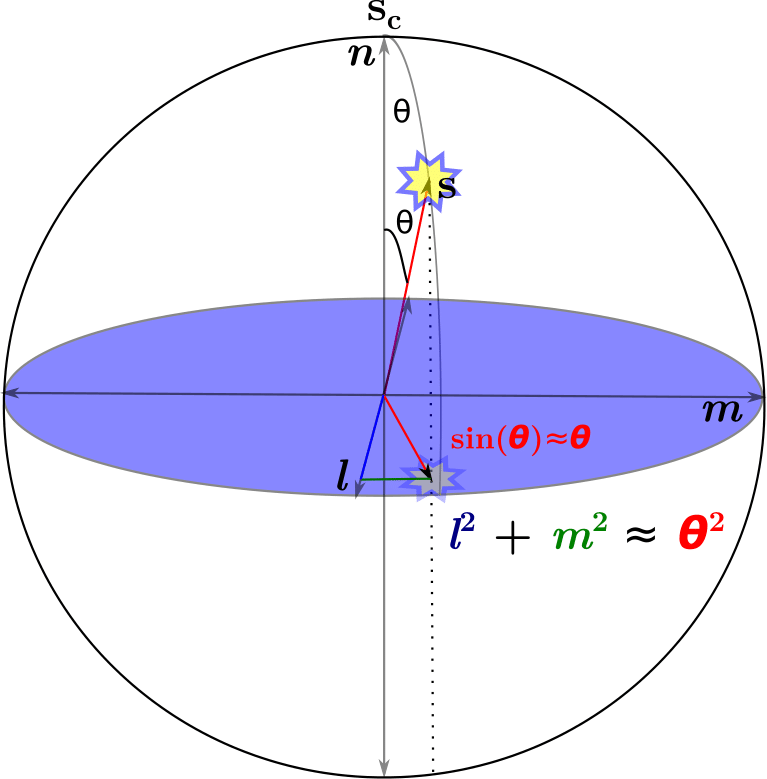

In [9]:
Image(filename='figures/und_lm.png', width=300, height=100)

*Caption: Why do we measure $l$ and $m$ in degrees? *<a id='pos:fig:understand_lm'></a> <!--\label{pos:fig:understand_lm}-->

### 3.6.1 Example

Here we have a couple of sources given in RA ($\alpha$) and DEC ($\delta$):
* Source 1: (5h 32m 0.4s,60$^{\circ}$17' 57'') - 1Jy
* Source 2: (5h 36m 12.8s,61$^{\circ}$ 12' 6.9'') - 0.5Jy
* Source 3: (5h 40m 45.5s,61$^{\circ}$ 56' 34'') - 0.2Jy

The field center is located at $(\alpha_0,\delta_0) = $ (5h 30m,60$^{\circ}$). The first step is to convert right ascension and declination into radians with

\begin{eqnarray}
\alpha_{\textrm{rad}} &=& \frac{\pi}{12} \bigg(h + \frac{m}{60} + \frac{s}{3600}\bigg)\\
\delta_{\textrm{rad}} &=& \frac{\pi}{180} \bigg(d + \frac{m_{\textrm{arcmin}}}{60}+\frac{s_{\textrm{arcsec}}}{3600}\bigg)
\end{eqnarray}

In the above equations $h,~m,~s,~d,~m_{\textrm{arcmin}}$ and $s_{\textrm{arcsec}}$ respectively denote hours, minutes, seconds, degrees, arcminutes and arcseconds. If we apply the above to our three sources we obtain

In [11]:
RA_rad = (np.pi/12)*np.array([5+30.0/60,5+32.0/60+0.4/3600,5+36.0/60+12.8/3600,5+40.0/60+45.5/3600])
DEC_rad = (np.pi/180)*np.array([60,60+17.0/60+57.0/3600,61+12.0/60+6.9/3600,61+56.0/60+34.0/3600])
Flux_sources_labels = np.array(["","1 Jy","0.5 Jy","0.2 Jy"])
Flux_sources = np.array([1,0.5,0.1]) #in Jy
print "RA (rad) of Sources and Field Center = ",RA_rad
print "DEC (rad) of Sources = ",DEC_rad

 RA (rad) of Sources and Field Center =  [ 1.43989663  1.44865237  1.46700741  1.48683872]
DEC (rad) of Sources =  [ 1.04719755  1.05241899  1.06817495  1.08110542]


Recall that we can use Eq. [INREF](#pos:eq:convert_lmn_ra_dec) <!--\label{pos:eq:convert_lmn_ra_dec}--> to convert between equatorial 
    and direction cosine coordinates, in terms of the current example this translates into the python code below. Note that before we can do the conversion we first need to calculate $\Delta \alpha$.

In [12]:
RA_delta_rad = RA_rad-RA_rad[0] #calculating delta alpha

l = np.cos(DEC_rad)*np.sin(RA_delta_rad)
m = (np.sin(DEC_rad)*np.cos(DEC_rad[0])-np.cos(DEC_rad)*np.sin(DEC_rad[0])*np.cos(RA_delta_rad))
print "l (degrees) = ",l*(180/np.pi)
print "m (degrees) = ",m*(180/np.pi)

l (degrees) =  [ 0.          0.24855826  0.74818685  1.26458942]
m (degrees) =  [ 0.          0.30010768  1.21061225  1.96811494]


Plotting the result.

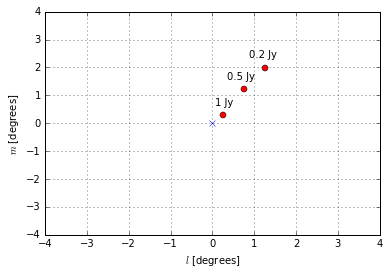

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel("$l$ [degrees]")
plt.ylabel("$m$ [degrees]")
plt.plot(l[0],m[0],"bx")
plt.hold("on")
plt.plot(l[1:]*(180/np.pi),m[1:]*(180/np.pi),"ro") 
counter = 1
for xy in zip(l[1:]*(180/np.pi)+0.25, m[1:]*(180/np.pi)+0.25):                                              
    ax.annotate(Flux_sources_labels[counter], xy=xy, textcoords='offset points',horizontalalignment='right',
                verticalalignment='bottom',xytext=None)  
    counter = counter + 1
        
plt.grid()

***

Next: 3.7  